In [3]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
# Data exploration

print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is " + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ... 5 6 8]
Labels shape is (60000,)
Labels type is <class 'numpy.ndarray'>


In [5]:
# Input shape: 60000 examples
# Each image: 28 x 28

train_x.shape

(60000, 28, 28)

In [6]:
# Matplotlib: Data visualization library
import matplotlib.pyplot as plt

5


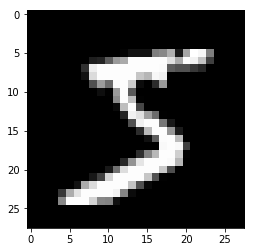

In [7]:
# Visualize the input samples

sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

In [8]:
# Flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

In [9]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [10]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# Let's see the result of categorizing the outputs
print(test_y_categorical[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [15]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# TODO: add layers to the model

# Hidden layer 1: 500 neurons, 'relu' activation

# Hidden layer 2: 250 neurons, 'relu' activation

# Output layer: 10 neurons (one for each class), softmax activation

In [17]:
# Compile the model, get ready to train

# TODO: compile the model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent (SGD)
    # Additional metrics: Accuracy

In [1]:
# Print model summary
model.summary()

NameError: name 'model' is not defined

In [18]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback #TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots

# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [19]:
# Fit the model to the training data
# 10 epochs, 32 batch size

# Validation split: reserve some of our training data to use as "validation" data
# Won't train on validation data -- check validation loss to look for overfitting

# Pass in our callbacks to track training progress

# TODO: train the model
    # Number of epochs: 5
    # Batch size: 32
    # Validation split: 0.1
    # Verbose setting: use TQDM progress bars

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

In [20]:
# Evaluate trained model on test data

# Returns final test loss and test accuracy
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)

print(loss_and_metrics)

10000/10000 [==============================] - 1s 64us/step
[0.07437518193386496, 0.9771]


[[7.3829615e-06 1.5711279e-07 2.7452162e-04 1.3182210e-03 1.6091647e-08
  3.2331081e-07 1.2449125e-10 9.9836475e-01 2.7114975e-06 3.1952830e-05]]
7


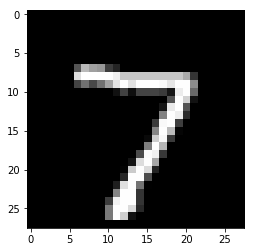

In [21]:
# Make sure our predictions make sense
import numpy as np

sample_num = 0 #which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # create a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores)

predicted_class = np.argmax(predicted_scores) # pick the class with the highest probability -> final prediction
print(predicted_class)

# Actual input
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()